<a href="https://colab.research.google.com/github/CelikAbdullah/deep-learning-notebooks/blob/main/Computer%20Vision/applications/image%20classification/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
from tensorflow import keras
import numpy as np

# Load FashionMNIST dataset

In [2]:
# load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# print the shape of training & test set
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

# Prepare the Fashion-MNIST dataset for training

We are able to increase the speed at which the parameters learn the optimal values and increase our chances of convergence by squashing the input values into a smaller range. Therefore, we divide each value by 255.

In [4]:
# convert values to float32 & scale images to the [0,1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

Let's make sure that our images have a shape of (28,28,1).

In [5]:
# bring images into a shape of (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
# print the shape of training & test set
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In order to compare our output vector, we need a 10-element vector as label. So, we have to convert the scalar-value labels into 10-element vectors with a 1 in the corresponding index. This is known as one-hot encoding.

In Keras, we can achieve one-hot encoding of labels via the helper method to_categorical.

In [7]:
# we have 10 digits
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


# Build the model

We build a very simple CNN.

In [18]:
def get_model(shape=(28,28,1)):

  # input layer
  inputs = keras.Input(shape=shape)

  # 1st & 2nd conv layer + max pooling
  x = keras.layers.Conv2D(filters=32, kernel_size=3, padding="same",  activation="relu")(inputs)
  x = keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
  x = keras.layers.MaxPooling2D(pool_size=2)(x)

  # 3rd & 4th conv layer + max pooling
  x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
  x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
  x = keras.layers.MaxPooling2D(pool_size=2)(x)

  # 5th & 6th conv layer + max pooling
  x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu")(x)
  x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu")(x)
  x = keras.layers.MaxPooling2D(pool_size=2)(x)

  # flatten the input for the dense layer
  x = keras.layers.Flatten()(x)

  # apply dropout for regularization to combat overfitting that might occur
  x = keras.layers.Dropout(0.5)(x)

  # softmax layer
  outputs = keras.layers.Dense(units=num_classes, activation="softmax")(x)

  # build the model
  model = keras.Model(inputs=inputs, outputs = outputs, name="simple_cnn_for_mnist")

  return model

In [19]:
# create our simple CNN
simple_cnn = get_model()

In [20]:
# print a summary of our CNN
simple_cnn.summary()

Model: "simple_cnn_for_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 64)        36928     
                                              

# Compile the model

In [21]:
# define the optimizer
optimizer = "adam"

# define the loss function
loss="categorical_crossentropy"

# define the metrics list
metrics=["accuracy"]

# compile the model
simple_cnn.compile(optimizer=optimizer,
                   loss=loss,
                   metrics=metrics)

# Define callbacks

In [22]:
# define the filepath
filepath = "my_simple_cnn.keras"

# the ModelCheckpoint callback will save the checkpoint only if the
# validation loss is smaller than the last checkpoint
checkpoint = keras.callbacks.ModelCheckpoint(filepath, save_best_only=True, monitor="val_loss")

# the EarlyStopping callback sets an early stop when the validation
# loss has stopped reducing for 3 epochs
earlystop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

# Train

During the training, we use 10% of the training set as validation.

In [23]:
history = simple_cnn.fit(x_train,
                         y_train,
                         batch_size=128,
                         epochs=50,
                         callbacks = [checkpoint, earlystop],
                         validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 321s 755ms/step - loss: 0.5843 - accuracy: 0.7869 - val_loss: 0.3552 - val_accuracy: 0.8677
Epoch 2/50
422/422 [==============================] - 317s 753ms/step - loss: 0.3454 - accuracy: 0.8741 - val_loss: 0.2935 - val_accuracy: 0.8940
Epoch 3/50
422/422 [==============================] - 315s 746ms/step - loss: 0.2850 - accuracy: 0.8969 - val_loss: 0.2578 - val_accuracy: 0.9065
Epoch 4/50
422/422 [==============================] - 314s 745ms/step - loss: 0.2505 - accuracy: 0.9103 - val_loss: 0.2265 - val_accuracy: 0.9182
Epoch 5/50
422/422 [==============================] - 316s 748ms/step - loss: 0.2280 - accuracy: 0.9169 - val_loss: 0.2160 - val_accuracy: 0.9197
Epoch 6/50
422/422 [==============================] - 314s 744ms/step - loss: 0.2094 - accuracy: 0.9235 - val_loss: 0.2039 - val_accuracy: 0.9270
Epoch 7/50
422/422 [==============================] - 312s 741ms/step - loss: 0.1929 - accuracy: 0.9286 - val_loss: 0.2081 -

# Visualization

In [24]:
import matplotlib.pyplot as plt

First, we look at how the training and validation loss evolved during training:

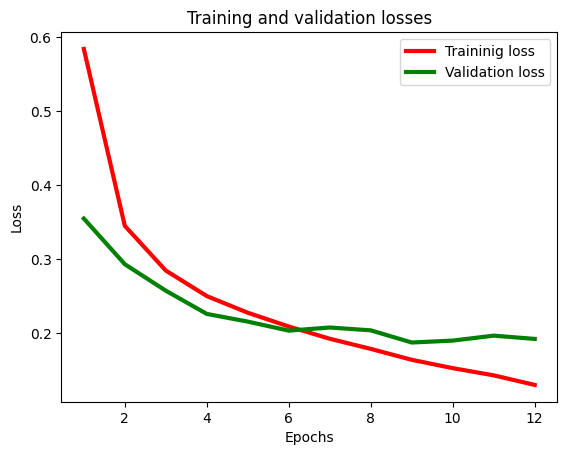

In [25]:
losses = history.history["loss"]
val_losses = history.history["val_loss"]
epochs = range(1, len(val_losses) + 1)

plt.plot(epochs, losses, color="red", linestyle="solid", label="Traininig loss", linewidth=3)
plt.plot(epochs, val_losses, color="green", linestyle="solid", label="Validation loss", linewidth=3)

plt.title("Training and validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Now, let's look at how the training and validation accuracy evolved during training:

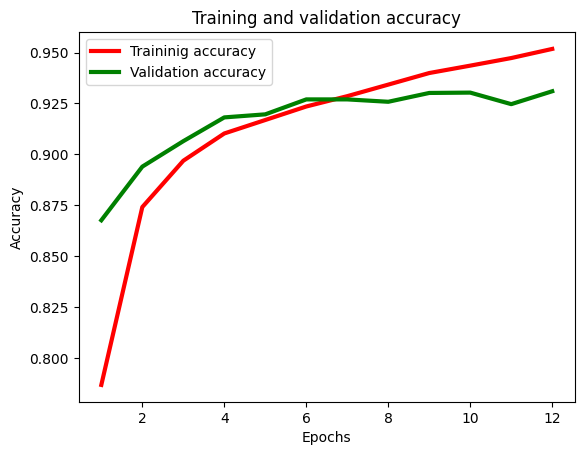

In [26]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(val_acc) + 1)
plt.plot(epochs, acc, color="red", linestyle="solid", label="Traininig accuracy", linewidth=3)
plt.plot(epochs, val_acc, color="green", linestyle="solid", label="Validation accuracy", linewidth=3)

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that overfitting starts after the 6th epoch.

# Evaluate the model

Now, we look at how our model performs on data it has never seen before.

In [27]:
test_loss, test_acc = simple_cnn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.208261176943779
Test accuracy: 0.9276000261306763


We can state that our simple convnet achieves ~92.8% test accuracy on the test data.